<a href="https://colab.research.google.com/github/divaamahajan/Hotel-Clustering-and-Search-Engine-for-Hotel-Listings-and-Reviews-Dataset/blob/main/Paris_Hotel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project aims to cluster Paris hotels and build a search engine for the Paris hotel listings and reviews dataset using natural language processing (NLP) techniques. First, the Paris hotel dataset is cleaned and analyzed through exploratory data analysis (EDA) to identify patterns and insights. Hotel descriptions for Paris hotels are then encoded using techniques such as TF-IDF and word embeddings to cluster similar Paris hotels using k-means and hierarchical clustering algorithms. Next, the Paris hotel clusters are interpreted to understand common themes or patterns. Finally, a search engine is built using FAISS to allow users to search for Paris hotels based on their queries. The project provides insights into the Paris hotel industry and demonstrates the use of NLP techniques for clustering and search applications.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import gensim
import re
import string
from gensim import corpora
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

!pip install visualise-spacy-tree
!pip install spacytextblob

import spacy
from spacy.matcher import Matcher 
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

import numpy as np
!pip install faiss-cpu
!pip install -U sentence-transformers
import faiss

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



^C
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Perform EDA and Data Cleaning:


* Load the datasets into a Pandas dataframe.
* Check for missing values, duplicates, and outliers.
* Clean the data by removing irrelevant columns, handling missing values, and converting categorical variables into numeric ones.
* Perform exploratory data analysis (EDA) by visualizing the data using plots, histograms, and summary statistics.

## Load the datasets into a Pandas dataframe.

In [ ]:
# Load the dataset into a Pandas dataframe
df_hotelList = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/Hotel-Clustering-and-Search-Engine-for-Hotel-Listings-and-Reviews-Dataset/main/HotelListInParis__en2019100120191005.csv')
df_reviews = pd.read_csv('https://github.com/divaamahajan/Hotel-Clustering-and-Search-Engine-for-Hotel-Listings-and-Reviews-Dataset/raw/main/hotelReviewsInParis__en2019100120191005.csv')

In [ ]:
# Remove the 'Unnamed: 0' column from dataframe
df_hotelList.drop('Unnamed: 0', axis=1, inplace=True)
df_hotelList.head()

,hotel_name,url,locality,reviews,tripadvisor_rating,checkIn,checkOut,price_per_night,booking_provider,no_of_deals,hotel_features
0,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN
1,Les3chambres,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,519,NaN,2019/10/01,2019/10/05,NaN,Booking.com,0,NaN
2,La Chambre Parisienne,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,91,NaN,2019/10/01,2019/10/05,NaN,TripAdvisor,5,NaN
3,Hyatt Regency Paris Etoile,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,663,NaN,2019/10/01,2019/10/05,NaN,Booking.com,12,NaN
4,Hotel Darcet,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,942,NaN,2019/10/01,2019/10/05,NaN,Booking.com,12,NaN


In [ ]:
df_reviews.drop('Unnamed: 0', axis=1, inplace=True)
df_reviews.head()

,review_body,review_date,hotelName,hotelUrl
0,Forgot to book a large bed so given a room wit...,"July 12, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...
1,This hotel was really nice overall but they lo...,"July 10, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...
2,Our complimentary breakfast was delicious. Sta...,"July 3, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...
3,"If I could give 0 stars, I would. Staff comple...","June 25, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...
4,This was a comfortable hotel in Montparnasse n...,"June 7, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...


In [ ]:
df_hotelList.shape

(30, 11)

## Add Hotel names to their Reviews

In [ ]:
# Merge the two dataframes based on the 'url' and 'hotelUrl' columns
df_reviews = pd.merge(df_reviews, df_hotelList, left_on='hotelUrl', right_on='url')
df_reviews.head()

,review_body,review_date,hotelName,hotelUrl,hotel_name,url,locality,reviews,tripadvisor_rating,checkIn,checkOut,price_per_night,booking_provider,no_of_deals,hotel_features
0,Forgot to book a large bed so given a room wit...,"July 12, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN
1,This hotel was really nice overall but they lo...,"July 10, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN
2,Our complimentary breakfast was delicious. Sta...,"July 3, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN
3,"If I could give 0 stars, I would. Staff comple...","June 25, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN
4,This was a comfortable hotel in Montparnasse n...,"June 7, 2019",0 Novotel Paris Centre Gare Montparnasse\nN...,http://www.tripadvisor.com/Hotel_Review-g18714...,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,$225,Booking.com,11,NaN


In [ ]:
df_reviews.shape

(1492, 15)

## Data cleaning

### Feature selection

Now, we need only hotel names and their reviews, as well as dates from above reviews dataframe df_reviews.

This is because we already have hotel data in Hotel List dataframe and urls are not needed since we have corresponding reviews.


In [ ]:
df_reviews = df_reviews[['review_body', 'hotel_name', 'review_date']]
df_reviews.head()


,review_body,hotel_name,review_date
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,"July 12, 2019"
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,"July 10, 2019"
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,"July 3, 2019"
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,"June 25, 2019"
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,"June 7, 2019"


### Delete duplicates

In [ ]:
# Suppose you have a DataFrame called df
df_hotelList.drop_duplicates(inplace=True)
df_reviews.drop_duplicates(inplace=True)

### Split currency and price Value

In [ ]:
# Split the 'price_per_night' column into two separate columns
df_hotelList[['price_currency', 'price_value']] = df_hotelList['price_per_night'].str.extract(r'^(\$)?(\d+)')
# Fill in missing values with null
# df[['price_currency', 'price_value']] = df[['price_currency', 'price_value']].fillna(value=np.nan)
df_hotelList = df_hotelList.drop(['price_per_night'], axis=1)

# Print the first few rows of the updated dataframe
df_hotelList.head()

,hotel_name,url,locality,reviews,tripadvisor_rating,checkIn,checkOut,booking_provider,no_of_deals,hotel_features,price_currency,price_value
0,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,NaN,2019/10/01,2019/10/05,Booking.com,11,NaN,$,225
1,Les3chambres,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,519,NaN,2019/10/01,2019/10/05,Booking.com,0,NaN,NaN,NaN
2,La Chambre Parisienne,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,91,NaN,2019/10/01,2019/10/05,TripAdvisor,5,NaN,NaN,NaN
3,Hyatt Regency Paris Etoile,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,663,NaN,2019/10/01,2019/10/05,Booking.com,12,NaN,NaN,NaN
4,Hotel Darcet,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,942,NaN,2019/10/01,2019/10/05,Booking.com,12,NaN,NaN,NaN


### Removing irrelevant columns

**Next**, Check for null values in each column

In [ ]:
# loop through each column in the dataframe
for col in df_hotelList.columns:
    # calculate percentage of null values
    null_percent = df_hotelList[col].isnull().sum() / len(df_hotelList) * 100
    
    # print the column name and the percentages
    print(f"{col} : {null_percent:.2f}% null ")

hotel_name : 0.00% null 
url : 0.00% null 
locality : 0.00% null 
reviews : 0.00% null 
tripadvisor_rating : 100.00% null 
checkIn : 0.00% null 
checkOut : 0.00% null 
booking_provider : 0.00% null 
no_of_deals : 0.00% null 
hotel_features : 100.00% null 
price_currency : 66.67% null 
price_value : 66.67% null 


**Observation:** tripadvisor_rating and hotel_features are 100% null, making them irrelavant. Let us remove them

In [ ]:
df_hotelList = df_hotelList.drop(['tripadvisor_rating', 'hotel_features'], axis=1)
df_hotelList.head()

,hotel_name,url,locality,reviews,checkIn,checkOut,booking_provider,no_of_deals,price_currency,price_value
0,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,2313,2019/10/01,2019/10/05,Booking.com,11,$,225
1,Les3chambres,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,519,2019/10/01,2019/10/05,Booking.com,0,NaN,NaN
2,La Chambre Parisienne,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,91,2019/10/01,2019/10/05,TripAdvisor,5,NaN,NaN
3,Hyatt Regency Paris Etoile,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,663,2019/10/01,2019/10/05,Booking.com,12,NaN,NaN
4,Hotel Darcet,http://www.tripadvisor.com/Hotel_Review-g18714...,Paris,942,2019/10/01,2019/10/05,Booking.com,12,NaN,NaN



**Next**, Let us check the percent of uniqueness of each column.

In [ ]:
col_list = [col for col in df_reviews.columns if not isinstance(df_reviews[col][0], list)]
num_cols = len(col_list)
for i, col in enumerate(col_list):
    unique = len(df_reviews[col].dropna().unique())
    if unique == 1: 
        unique = 0
    col_list[i] = (col, (unique)*100/df_reviews.shape[0])

# sort the list based on the values in descending order
sorted_col = sorted(col_list, key=lambda x: x[1], reverse=True)

for col in sorted_col:
    print(f"{col[0]} : {col[1]:.2f}% unique")


review_body : 100.00% unique
review_date : 57.57% unique
hotel_name : 2.01% unique


**Observation:** we can remove review_date.

In [ ]:
df_reviews = df_reviews.drop(['review_date'], axis=1)

In [ ]:
col_list = list(df_hotelList)
num_cols = len(col_list)
for i, col in enumerate(col_list):
  unique = len(df_hotelList[col].dropna().unique().tolist())
  if unique == 1: 
    unique = 0
  col_list[i] = (col, (unique)*100/df_hotelList.shape[0])

# sort the list based on the values in descending order
sorted_col = sorted(col_list, key=lambda x: x[1], reverse=True)

for col in sorted_col:
  print(f"{col[0]} : {col[1]:.2f}% unique")


hotel_name : 100.00% unique
url : 100.00% unique
reviews : 100.00% unique
price_value : 33.33% unique
no_of_deals : 30.00% unique
booking_provider : 23.33% unique
locality : 0.00% unique
checkIn : 0.00% unique
checkOut : 0.00% unique
price_currency : 0.00% unique


**Observation:** 
* We can drop locality, checkIn, checkOut and price_currency for its 100% similarity or say 0% uniqueness as it is not going to add any value to our model.

In [ ]:
df_hotelList = df_hotelList.drop(['locality', 'checkIn', 'checkOut', 'price_currency'], axis=1)
df_hotelList.head()

,hotel_name,url,reviews,booking_provider,no_of_deals,price_value
0,Novotel Paris Centre Gare Montparnasse,http://www.tripadvisor.com/Hotel_Review-g18714...,2313,Booking.com,11,225
1,Les3chambres,http://www.tripadvisor.com/Hotel_Review-g18714...,519,Booking.com,0,NaN
2,La Chambre Parisienne,http://www.tripadvisor.com/Hotel_Review-g18714...,91,TripAdvisor,5,NaN
3,Hyatt Regency Paris Etoile,http://www.tripadvisor.com/Hotel_Review-g18714...,663,Booking.com,12,NaN
4,Hotel Darcet,http://www.tripadvisor.com/Hotel_Review-g18714...,942,Booking.com,12,NaN


**Observation:** 
* We can merge the data based on hotel name now, since we already merged our data based on url. We can thus drop hotelUrl.

In [ ]:
df_hotelList = df_hotelList.drop(['url'], axis=1)
df_hotelList.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value
0,Novotel Paris Centre Gare Montparnasse,2313,Booking.com,11,225
1,Les3chambres,519,Booking.com,0,NaN
2,La Chambre Parisienne,91,TripAdvisor,5,NaN
3,Hyatt Regency Paris Etoile,663,Booking.com,12,NaN
4,Hotel Darcet,942,Booking.com,12,NaN


### Handling missing values

In [ ]:
# loop through each column in the dataframe
for col in df_reviews.columns:
    # calculate percentage of null values
    null_percent = df_reviews[col].isnull().sum() / len(df_reviews) * 100
    
    # print the column name and the percentages
    print(f"{col} : {null_percent:.2f}% null ")

review_body : 0.00% null 
hotel_name : 0.00% null 


**Observation:** No missing values in reviews.

In [ ]:
# loop through each column in the dataframe
for col in df_hotelList.columns:
    # calculate percentage of null values
    null_percent = df_hotelList[col].isnull().sum() / len(df_hotelList) * 100
    
    # print the column name and the percentages
    print(f"{col} : {null_percent:.2f}% null ")

hotel_name : 0.00% null 
reviews : 0.00% null 
booking_provider : 0.00% null 
no_of_deals : 0.00% null 
price_value : 66.67% null 


**Observation:** The price_value is 66.22% null . Let us manage them by filling in the missing values with some measure of central tendency such as the mean or median of the available data. This would let us to retain the rows with missing values and preserve more of the data.

In [ ]:
# Convert the 'price_per_night' column to a numeric data type
df_hotelList['price_value'] = pd.to_numeric(df_hotelList['price_value'], errors='coerce')

# Calculate the mean or median of the available values in the 'price_per_night' column
price_mean = df_hotelList['price_value'].mean()
price_median = df_hotelList['price_value'].median()

# Fill in the missing values with the mean or median
df_hotelList['price_value'] = df_hotelList['price_value'].fillna(price_mean)  # or price_median

# Verify that there are no more missing values in the 'price_per_night' column
print(df_hotelList['price_value'].isnull().sum())


0


In [ ]:
df_hotelList.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value
0,Novotel Paris Centre Gare Montparnasse,2313,Booking.com,11,225.0
1,Les3chambres,519,Booking.com,0,205.2
2,La Chambre Parisienne,91,TripAdvisor,5,205.2
3,Hyatt Regency Paris Etoile,663,Booking.com,12,205.2
4,Hotel Darcet,942,Booking.com,12,205.2


In [ ]:
df_hotelList['price_value'].isnull().sum() / len(df_hotelList) * 100


0.0

## Feature transformation

### List all distinct values for each columns


In [ ]:
df_hotelList['no_of_deals'].unique()

array([11,  0,  5, 12, 10, 13, 14, 16,  8])

In [ ]:
df_hotelList['price_value'].unique()

array([225. , 205.2, 181. , 229. , 269. , 204. , 287. , 102. , 184. ,
       164. , 207. ])

### Categorical data transformation

In [ ]:
#Find categorical column in dataframe
cat_cols = df_hotelList.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols

['hotel_name', 'booking_provider']

**Observation:** We are going to need 'review_body' for search engine, but we must transform 'hotel_name' and 'booking_provider'.

In [ ]:
df_hotelList.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value
0,Novotel Paris Centre Gare Montparnasse,2313,Booking.com,11,225.0
1,Les3chambres,519,Booking.com,0,205.2
2,La Chambre Parisienne,91,TripAdvisor,5,205.2
3,Hyatt Regency Paris Etoile,663,Booking.com,12,205.2
4,Hotel Darcet,942,Booking.com,12,205.2


**Transform categorical columns to numerical data using Label Encoding**

In [ ]:
cat_cols = cat_cols[1:]
cat_cols

['booking_provider']

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_categorical = df_hotelList.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_categorical[col] = le.fit_transform(df_categorical[col])
df_categorical.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value
0,Novotel Paris Centre Gare Montparnasse,2313,1,11,225.0
1,Les3chambres,519,1,0,205.2
2,La Chambre Parisienne,91,6,5,205.2
3,Hyatt Regency Paris Etoile,663,1,12,205.2
4,Hotel Darcet,942,1,12,205.2


## Visualising the records

### Hotels vs number of Reviews

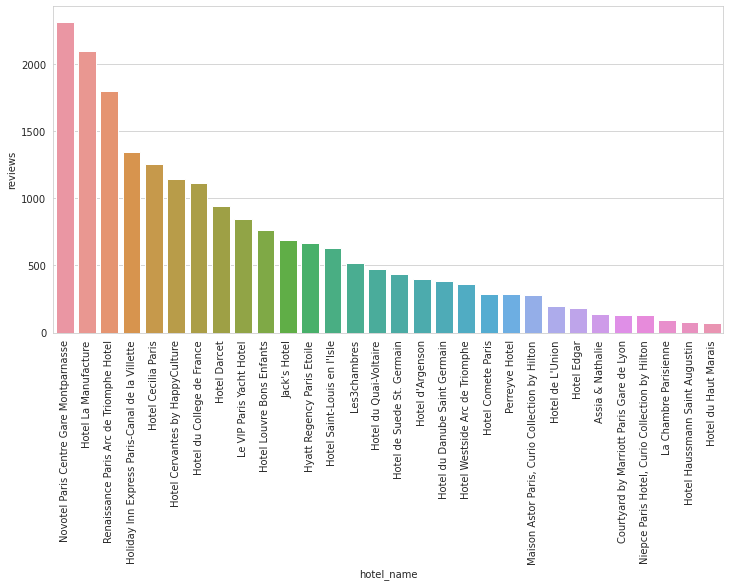

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new_sorted = df_hotelList.sort_values('reviews', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="hotel_name", y="reviews", data=df_new_sorted, order=df_new_sorted['hotel_name'])
plt.xticks(rotation=90)
plt.show()


**Top 5 hotels in terms of most reviews**

In [ ]:
df_new_sorted['hotel_name'].head()

0             Novotel Paris Centre Gare Montparnasse
13                              Hotel La Manufacture
21           Renaissance Paris Arc de Triomphe Hotel
24    Holiday Inn Express Paris-Canal de la Villette
5                                Hotel Cecilia Paris
Name: hotel_name, dtype: object

**Observation** It might imply that the hotels listed above are more popular with tourists or have been around for a longer period of time. It is crucial to remember that the quantity of reviews alone is not always a reliable indicator of the hotel's quality. Even if they had a positive experience, some visitors may decide not to leave a review, while others may do the opposite if their expectations were not met. To gain a deeper understanding of the hotel's performance, it is crucial to also consider the reviews' content.

### Hotels vs Price

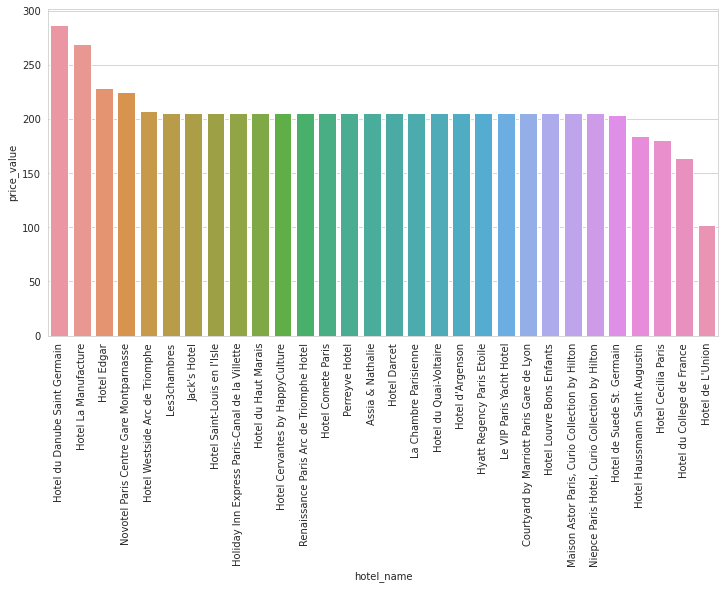

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new_sorted = df_hotelList.sort_values('price_value', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="hotel_name", y="price_value", data=df_new_sorted, order=df_new_sorted['hotel_name'])
plt.xticks(rotation=90)
plt.show()


**Top 5 hotels most expensive Hotels**

In [ ]:
df_new_sorted['hotel_name'].head(4)

15             Hotel du Danube Saint Germain
13                      Hotel La Manufacture
10                               Hotel Edgar
0     Novotel Paris Centre Gare Montparnasse
Name: hotel_name, dtype: object

**Observation:** This could indicate that the hotels listed above are more expensive or have more amenities. A high price, however, is not always a trustworthy predictor of the hotel's facilities. This is mostly because of the fact that 66% of this price is computed using mean values rather than provided values.

### Count of unique booking Providers

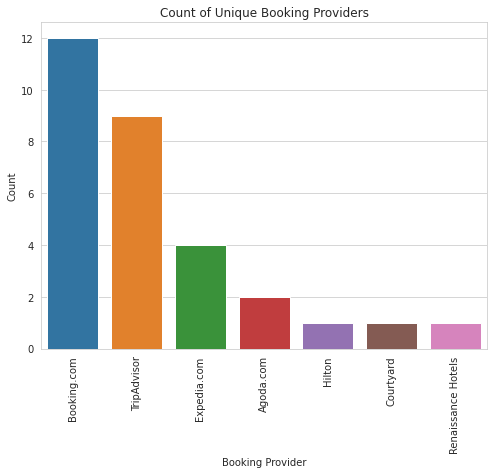

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

provider_counts = df_hotelList['booking_provider'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=provider_counts.index, y=provider_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Booking Provider')
plt.ylabel('Count')
plt.title('Count of Unique Booking Providers')
plt.show()


**Top 2 Booking providers**

In [ ]:
provider_counts.head(2)

Booking.com    12
TripAdvisor     9
Name: booking_provider, dtype: int64

**Observation:** It might imply that the Booking providers listed above are more popular amongst customer and travelers or might provide more deals. However, a high count of bookings via these 2 providers is not always a reliable indicator of the booking provider's deals. This is because we have a dataset of only small set of hotels.

### Booking Provider vs no. of deals

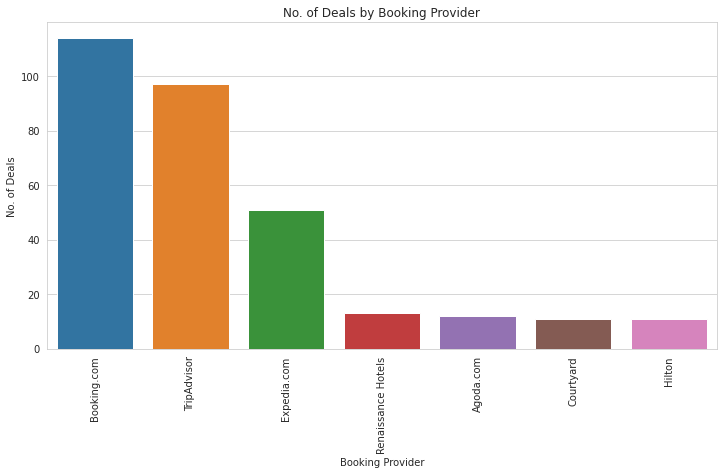

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group data by booking provider and sum up no. of deals
deals_by_provider = df_hotelList.groupby('booking_provider')['no_of_deals'].sum().sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=deals_by_provider.index, y=deals_by_provider.values, order=deals_by_provider.index)
plt.xticks(rotation=90)
plt.xlabel('Booking Provider')
plt.ylabel('No. of Deals')
plt.title('No. of Deals by Booking Provider')
plt.show()


**Most deal providing top 2 Booking Providers**

In [ ]:
deals_by_provider.nlargest(2)

booking_provider
Booking.com    114
TripAdvisor     97
Name: no_of_deals, dtype: int64

**Observation** It might imply that the Booking Providers listed above provide more deals and that is why, they are more popular amongst the travellers as per previous visualisation.

# Data Preparation for Clustering and Search Engine

Pre-processing step of data preparation, which is an essential part of any text analysis project. We are cleaning and transforming the raw text data into a format that is more suitable for analysis and extracting meaningful information from the text data by identifying important parts of speech like verbs, nouns, and adjectives.

## Data cleaning

In [ ]:
df_reviews['review_body'][0]

'Forgot to book a large bed so given a room with 2 singles and they are small (I am a normal BMI adult and almost fell out several times in night).So very tired.Food very good albeit limited choiceService very goodBathroom weird - toilet quite removed from sink and shower I would t stay again but cause sleep is important for me. Am sure if you have a proper double or larger bed your sleep will be fine'

It's important to clean the text in the "review_body" column by removing any punctuation, stop words, and converting all text to lowercase.

In [ ]:
import string
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean(text):
    # convert text to lowercase
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t', '', text)
    
    # removing new line characters
    text = re.sub('\n ', '', text)
    text = re.sub('\n', ' ', text)
    
    # removing hyphens
    text = re.sub("-", ' ', text)
    text = re.sub("— ", '', text)
    
    # removing quotation marks
    text = re.sub('\"', '', text)
    
    # removing salutations
    text = re.sub("Mr\.", 'Mr', text)
    text = re.sub("Mrs\.", 'Mrs', text)
    
    return text


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

# function for extracting verbs and nouns with adjectives based on dependency parsing
def extract_verbs_nouns_with_adjectives(text):
    
    # create a spaCy doc object for the input text
    doc = nlp(text)

    # initialize an empty string to store the extracted tokens
    extracted_tokens = ''

    # loop through each token in the doc object
    for token in doc:
        
        # if the token is a verb, add it to the extracted tokens string
        if (token.pos_ == 'VERB'):           
            extracted_tokens = extracted_tokens + ' ' + str(token)
        
        # if the token is a noun, check if it has any adjective children
        if (token.pos_ == 'NOUN'):
            has_adjective = False

            # loop through each child of the noun token
            for subtoken in token.children:
                
                # if the child is an adjective, add it to the extracted tokens string along with the noun token
                if (subtoken.pos_ == 'ADJ'):  
                    extracted_tokens = extracted_tokens + ' ' + str(subtoken) + ' ' + str(token)
                    has_adjective = True

            # if the noun token has no adjective children, add it to the extracted tokens string alone
            if not has_adjective:
                extracted_tokens = extracted_tokens + ' ' + str(token)

    # return the final extracted tokens string
    return extracted_tokens

In [ ]:
df_reviews['review_body_clean'] = df_reviews['review_body'].apply(clean)

df_reviews.head()

,review_body,hotel_name,review_body_clean
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,forgot book large bed given room 2 singles sma...
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,hotel really nice overall location really bad ...
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,complimentary breakfast delicious staff kind h...
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,could give 0 stars would staff completely unhe...
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,comfortable hotel montparnasse far montparnass...


In [ ]:
df_reviews['review_body_clean'][0]

'forgot book large bed given room 2 singles small normal bmi adult almost fell several times nightso tiredfood good albeit limited choiceservice goodbathroom weird toilet quite removed sink shower would stay cause sleep important sure proper double larger bed sleep fine'

## Extracting nouns and verbs from the text along with adjectives


### POS Tagging example

Part-of-Speech tagging is referred to as POS tagging. It is a method of NLP (natural language processing) that entails associating each word in a sentence with the appropriate part of speech, such as an adjective, adverb, noun, or verb. This procedure aids in the analysis of the sentence's construction and the extraction of pertinent data regarding the relationships between its constituent words.

In [ ]:
text = df_reviews['review_body_clean'][0]
text

'forgot book large bed given room 2 singles small normal bmi adult almost fell several times nightso tiredfood good albeit limited choiceservice goodbathroom weird toilet quite removed sink shower would stay cause sleep important sure proper double larger bed sleep fine'

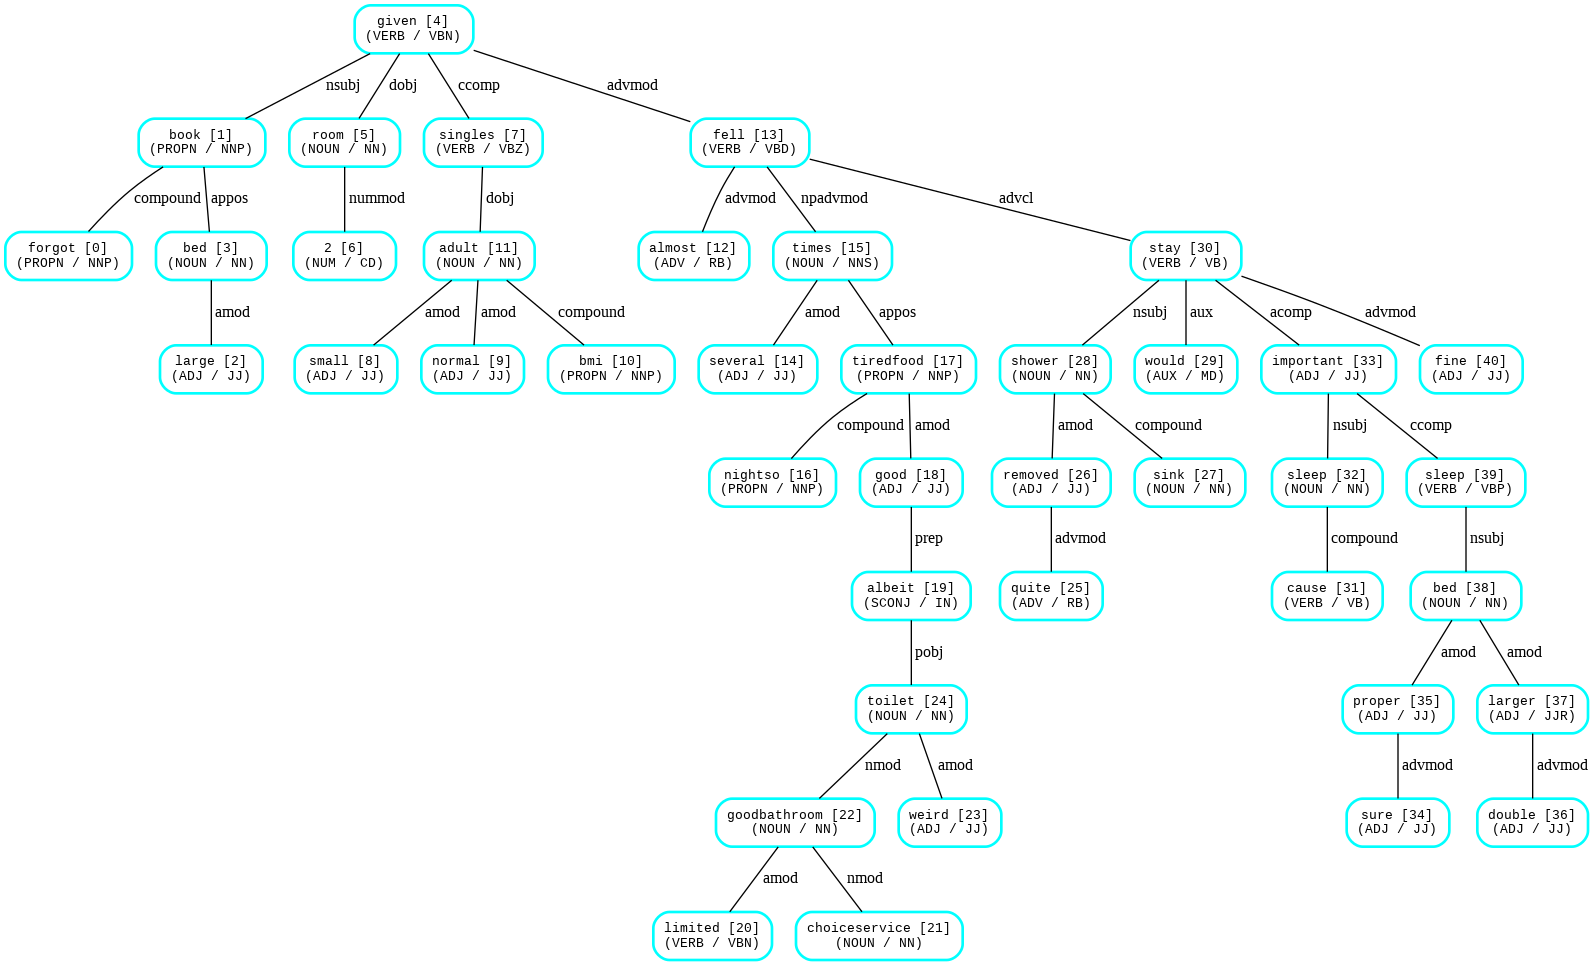

In [ ]:
doc = nlp(text) 
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

### Extraction via POS

In [ ]:
# Extracting nouns and verbs from the text along with adjectives
df_reviews['review_body_clean'] = df_reviews['review_body_clean'].apply(extract_verbs_nouns_with_adjectives)
df_reviews.head()

,review_body,hotel_name,review_body_clean
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,large bed given room singles small adult norm...
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,bad hotel nice location overall location hour...
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,breakfast complimentary staff delicious staff...
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,give stars staff booked room unhelpful hotel ...
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,hotel comfortable montparnasse montparnasse t...


In [ ]:
df_reviews['review_body_clean'][0]

' large bed given room singles small adult normal adult fell several times limited choiceservice goodbathroom weird toilet sink removed shower stay cause sleep proper bed larger bed sleep'

## Topic Modeling

Topic modeling has been done to summarise data and find out what the hotel review is about. It uses parts of speech tagging to extract nouns and adjectives pair from the review text.


In [ ]:

# function for topic modelling using extracted verbs and nouns with adjectives
# text =  extract verbs and nouns with adjectives from the input text using the extract_verbs_nouns_with_adjectives function
def topic_modelling(text):    

    # create a spaCy parsed_text object for the extracted tokens
    parsed_text = nlp(text)

    # initialize an empty list to store the topics
    topics = []

    # loop through each token in the parsed_text object
    for token in parsed_text:

        # if the token is a noun, check if it has any adjective children
        if (token.pos_ == 'NOUN'):
            has_adjective = False

            # loop through each child of the noun token
            for subtoken in token.children:
                
                # if the child is an adjective, append the adjective-noun pair to the topics list
                if (subtoken.pos_ == 'ADJ'):  
                    topics.append((subtoken, token))
                    has_adjective = True

            # if the noun token has no adjective children, append it to the topics list
            if not has_adjective:
                topics.append(token)

    # return the final list of topics
    return topics

In [ ]:
#extracting topics from the reviews - nouns / nouns+adjectives
df_reviews['topics'] = df_reviews['review_body_clean'].apply(topic_modelling)
df_reviews.head()

,review_body,hotel_name,review_body_clean,topics
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,large bed given room singles small adult norm...,"[(large, bed), room, (small, adult), (normal, ..."
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,bad hotel nice location overall location hour...,"[hotel, (bad, location), (nice, location), loc..."
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,breakfast complimentary staff delicious staff...,"[breakfast, (complimentary, staff), delicious,..."
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,give stars staff booked room unhelpful hotel ...,"[stars, staff, room, (unhelpful, hotel), air, ..."
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,hotel comfortable montparnasse montparnasse t...,"[hotel, montparnasse, montparnasse, tower, (co..."


In [ ]:
df_reviews['topics'][0]

[(large, bed),
 room,
 (small, adult),
 (normal, adult),
 (several, times),
 (limited, choiceservice),
 goodbathroom,
 (weird, toilet),
 sink,
 cause,
 sleep,
 (proper, bed),
 (larger, bed)]

## Sentiment Analysis

Sentiment analysis is used to derive the overall sentiment of the entire review text. It gives an overall feedback but this can be extended to derive sentiment on particular topic. For example good food, bad ambience, etc.

So sentiment for food is positive but ambience is negative.

In [ ]:
# Define a function to determine the sentiment of a given text
def determine_sentiment(text):
    
  # Parse the text using a natural language processing library
  parsed_text = nlp(text)
  # Get the polarity score of the text
  polarity_score = parsed_text._.blob.polarity
  
  # Round the polarity score to two decimal places
  rounded_polarity_score = round(polarity_score, 2)
  
  # Determine the sentiment label based on the polarity score
  if rounded_polarity_score > 0.3:
    sentiment_label = "Positive"
  elif rounded_polarity_score < -0.3:
    sentiment_label = "Negative"
  else:
    sentiment_label = "Neutral"
  
  # Return the sentiment label
  return sentiment_label


In [ ]:
# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
nlp.add_pipe('spacytextblob')
  
#detecting over all sentiment of the review
df_reviews['sentiment'] = df_reviews['review_body'].apply(determine_sentiment)
df_reviews.head()
# df['sentiment'] = df['review_body'].apply(sentiment)

,review_body,hotel_name,review_body_clean,topics,sentiment
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,large bed given room singles small adult norm...,"[(large, bed), room, (small, adult), (normal, ...",Neutral
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,bad hotel nice location overall location hour...,"[hotel, (bad, location), (nice, location), loc...",Neutral
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,breakfast complimentary staff delicious staff...,"[breakfast, (complimentary, staff), delicious,...",Positive
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,give stars staff booked room unhelpful hotel ...,"[stars, staff, room, (unhelpful, hotel), air, ...",Neutral
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,hotel comfortable montparnasse montparnasse t...,"[hotel, montparnasse, montparnasse, tower, (co...",Neutral


In [ ]:
df_reviews['sentiment'][0]

'Neutral'

# Creating the Clusters of Hotels

* Define the objective of the clustering task (example: grouping similar hotels together).
* Choose an appropriate clustering algorithm (example: k-means, hierarchical clustering, DBSCAN, etc.).
* Prepare the data for clustering by transforming it into a suitable format (example: bag-of-words, TF-IDF, word embeddings, etc.).
* Cluster the hotels using the chosen algorithm.
* Evaluate the quality of the clustering using appropriate metrics (example: silhouette score, inertia, etc.).

## Objective

The objective of the clustering task is to group hotels together based on similarities in their review_body, hotel_name, reviews, booking_provider, no_of_deals, and price_value attributes. This can help in identifying similar hotels for various purposes such as marketing, pricing, and recommendations.

## Data Preparation

We have already preprocessed the data by removing any unnecessary columns that won't be used in clustering, but we need the "review_body" now for cluster preparation.

We can aggregate all the reviews in the "review_body" column for each hotel and also for each unique value of the "hotel_name" column. Concatenating them into a single string separated by spaces and returning the result in a new DataFrame with the "hotelUrl" column as the index.

In [ ]:
df1 = df_reviews.groupby("hotel_name")["topics"].apply(lambda x: " ".join(map(str, x))).reset_index()
df1.head()

,hotel_name,topics
0,Assia & Nathalie,"[week, (enough, hosts), trip, (wonderful, grou..."
1,Courtyard by Marriott Paris Gare de Lyon,"[room, use, marriott, points, bit, (negative, ..."
2,Holiday Inn Express Paris-Canal de la Villette,"[way, city, centre, head, metro, system, train..."
3,Hotel Cecilia Paris,"[wife, nights, location, (next, champs), (perf..."
4,Hotel Cervantes by HappyCulture,"[railway, (next, hub), hotel, (quiet, summer),..."


In [ ]:
df_review_per_hotel = df_reviews.groupby("hotel_name").agg({"topics": lambda x: " ".join(map(str, x)), "review_body_clean": lambda x: " ".join(x)}).reset_index()
df_review_per_hotel.head()

,hotel_name,topics,review_body_clean
0,Assia & Nathalie,"[week, (enough, hosts), trip, (wonderful, grou...",spent week say enough hosts made trip wonderf...
1,Courtyard by Marriott Paris Gare de Lyon,"[room, use, marriott, points, bit, (negative, ...",needed room wanted use marriott points bit gi...
2,Holiday Inn Express Paris-Canal de la Villette,"[way, city, centre, head, metro, system, train...",way city centre makes get head metro system t...
3,Hotel Cecilia Paris,"[wife, nights, location, (next, champs), (perf...",wife stayed nights consider going location ne...
4,Hotel Cervantes by HappyCulture,"[railway, (next, hub), hotel, (quiet, summer),...",located railway next hub hotel quiet summer s...


In [ ]:
# merge the two dataframes on the 'hotel_name' column
merged_df = pd.merge(df_categorical, df_review_per_hotel, on='hotel_name', how='left')

# display the merged dataframe
merged_df.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value,topics,review_body_clean
0,Novotel Paris Centre Gare Montparnasse,2313,1,11,225.0,"[(large, bed), room, (small, adult), (normal, ...",large bed given room singles small adult norm...
1,Les3chambres,519,1,0,205.2,"[heat, wave, room, (clean, bathroom), (large, ...",loved stay heat wave room decorated updated c...
2,La Chambre Parisienne,91,6,5,205.2,"[chambre, (old, access), (silent, access), (sa...",chambre decorated smelled located old house s...
3,Hyatt Regency Paris Etoile,663,1,12,205.2,"[wife, daughter, nights, (great, location), di...",stayed wife daughter nights emphasise great l...
4,Hotel Darcet,942,1,12,205.2,"[room, (decent, size), windows, faclilities, n...",room decent size dualaspect windows coffeemak...


In [ ]:
merged_df.shape

(30, 7)

## Vectorization

Convert the preprocessed text data into a numerical form that can be used for clustering.  We used TF-IDF vectorization or word embedding techniques like Word2Vec or GloVe to convert the text into a vector format.

In [ ]:
# # create a TfidfVectorizer object
"""
max_features=1000 : only the top 1000 most frequent words will be included in the vocabulary.
ngram_range=(1,2): both unigrams (single words) and bigrams (pairs of words) will be included.
stop_words: sets the list of stop words to be removed from the documents.
token_pattern: sets the regular expression used to tokenize the text."""

tfidf = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2, ngram_range=(1, 2), stop_words=list(stop_words), token_pattern=r'\b\w+\b')

# fit and transform the preprocessed text data to create a numerical representation
reviews = merged_df['review_body_clean']
X = tfidf.fit_transform(reviews)

X.shape

(30, 1000)

## Dimensionality Reduction

Vectorized data has a high dimensionality (30, 1871), we want to reduce the dimensionality to make clustering more efficient. One of the more popular dimensionality reduction techniques include Principal Component Analysis (PCA), so let's implement it.

###Calculate PCA

In [ ]:
from sklearn.decomposition import PCA

# Instantiate a PCA object
pca = PCA()

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X.toarray())

pca.fit(X_pca)
# data

PCA()

**Plot and check the variance of the components:**

We need to decide how many features we’d like to keep based on the cumulative variance plot.

In [ ]:
var = np.round(pca.explained_variance_ratio_*100, decimals = 2)
pd.DataFrame(var).head()

,0
0,13.53
1,6.59
2,5.80
3,5.09
4,4.95


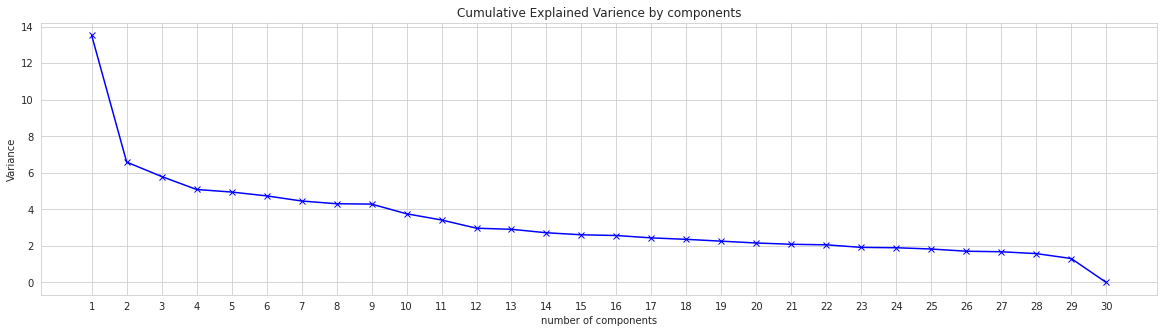

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(1,len(var)+1), var,'bx-')
plt.xticks(range(1,len(var)+1))
plt.xlabel("number of components")
plt.ylabel("Variance")
plt.title('Cumulative Explained Varience by components')
plt.show()

This graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 75% to 80% of the variance. So, in this instance, we decide to keep 2 components.

### Perform PCA with the chosen number of components.(2)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_pca)
scores_pca = pca.transform(X_pca)
pd.DataFrame(scores_pca).head()

,0,1
0,-0.127589,0.036587
1,0.714331,-0.083448
2,0.749773,-0.190158
3,-0.114429,0.175346
4,-0.165469,-0.130369


We’ll incorporate the newly obtained PCA scores in the clustering algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

## Clustering algorithm - k-means

An appropriate clustering algorithm for this task could be k-means, depending on the size of the dataset and the desired level of granularity in the clusters.

### Find K in Kmeans
Find the Optimal Number of Clusters from PCA calculated.
We iterate the values of k from 1 to 10 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [ ]:
from scipy.spatial.distance import cdist

K = range(1, 11)
inertias = []
distortions = []
distortion_map = {}
inertia_map = {}

#create list to hold inertias values for each k(number of clusters)
# The one with the lowest inertias can be chosen to be number of clusters

for k in K:
	# Building and fitting the model
    kmeanModel_pca = KMeans(n_clusters=k)
    kmeanModel_pca.fit(scores_pca)
    inertias.append(kmeanModel_pca.inertia_)
    distortions.append(sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
										'euclidean'), axis=1)) / scores_pca.shape[0])
    distortion_map[k] = sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
                                   'euclidean'), axis=1)) / scores_pca.shape[0]
    inertia_map[k] = kmeanModel_pca.inertia_


**Visualize results with Inertia~ Intra-cluster Distances**

In [ ]:
for key, val in inertia_map.items():
	print(f'{key} : {val}')

1 : 3.416140990305773
2 : 1.4329573972185292
3 : 0.6142583198620086
4 : 0.31852982790155154
5 : 0.21619542389906277
6 : 0.1401592748395592
7 : 0.10621252956049063
8 : 0.08271447669700868
9 : 0.0647893591468883
10 : 0.05198119875491592


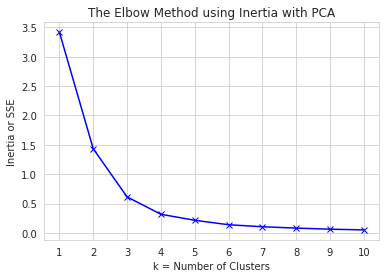

In [ ]:
#visualize results
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Inertia with PCA')
plt.show()

**Visualize results with Distortions~Inter-cluster Distances**

In [ ]:
for key, val in distortion_map.items():
	print(f'{key} : {val}')

1 : 0.2580262127754985
2 : 0.15884746558651275
3 : 0.11813189193338264
4 : 0.08648069887448309
5 : 0.07239255156092085
6 : 0.057967990740666074
7 : 0.04940932904108542
8 : 0.0443319013237968
9 : 0.038950903522016696
10 : 0.03482459127764233


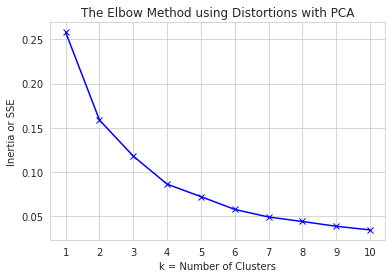

In [ ]:
#visualize results
plt.plot(K, distortions, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Distortions with PCA')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters is 3.

In [ ]:
num_clusters = 3

### Perform K-Means Clustering using Optimal K(3)


In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeanModel_pca = KMeans( n_clusters=num_clusters, random_state=42)

# We are going to use the fit predict method that returns for each observation 
# which cluster it belongs to.
kmeanModel_pca = kmeanModel_pca.fit(scores_pca)
cluster_labels = kmeanModel_pca.fit_predict(scores_pca)

#view cluster assignments for each observation
kmeanModel_pca.labels_ += 1
kmeanModel_pca.labels_

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

### Evaluate performance

####Centroid coordinates

In [ ]:
#coordinates of the centroid of each cluster obtained through the KMeans clustering 
#same number of columns as the number of features used in the clustering
pd.DataFrame(kmeanModel_pca.cluster_centers_)

,0,1
0,-0.114934,-0.003361
1,0.627652,-0.178459
2,0.362753,0.797861


####Inertia

The intra-cluster sum of squares, also referred to as the intra-cluster distance, is measured by kmeanModel pca.inertia_ as the sum of squared distances between each data point and the centroid of its assigned cluster. The data points are more tightly packed together within their designated clusters when the inertia_ value is lower.

In [ ]:
#Inertia of the selected K_Model with PCA
kmeanModel_pca.inertia_

0.6142583198620086

####Distortion

The intra-cluster sum of squares, also referred to as distortion, is the average of the squared distances between each data point and its nearest centroid. The closer the data points are packed together within their designated clusters, the lower the distortion value.

In [ ]:
# Distortion of the selected K_Model with PCA
sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
										'euclidean'), axis=1)) / scores_pca.shape[0]

0.11813189193338264

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
inertia = kmeanModel_pca.inertia_
inertia


0.6142583198620086

#### Silhouette avg

How clearly defined the clusters are in the dataset is measured by silhouette avg. In order to calculate a score for each data point, it takes into account both the intra-cluster distance and the inter-cluster distance. The silhouette avg score is then calculated by averaging these scores across all of the data points in the dataset. A higher silhouette avg score means that the data were more effectively divided into distinct clusters by the clustering algorithm.

In [ ]:
silhouette_avg

0.18002044190598912

In [ ]:

# Step 8: Analyze clusters
merged_df['cluster'] = cluster_labels
cluster_analysis = merged_df.groupby('cluster').mean()
cluster_analysis

,reviews,booking_provider,no_of_deals,price_value
cluster,,,,
1,734.72,2.92,11.24,205.2
2,206.25,2.50,4.25,205.2
3,842.00,6.00,11.00,205.2


# Explain the Clusters and Interpret the Hotels

##Append cluster assingments to original DataFrame

In [ ]:
#append cluster assingments to original DataFrame
df_kmeans_pca = pd.concat([merged_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_kmeans_pca.columns.values[-2:] = ['PCA1', 'PCA2']
df_kmeans_pca['cluster_k_PCA'] = kmeanModel_pca.labels_

#view updated DataFrame
df_kmeans_pca.head()

,hotel_name,reviews,booking_provider,no_of_deals,price_value,topics,review_body_clean,cluster,PCA1,PCA2,cluster_k_PCA
0,Novotel Paris Centre Gare Montparnasse,2313,1,11,225.0,"[(large, bed), room, (small, adult), (normal, ...",large bed given room singles small adult norm...,1,-0.127589,0.036587,1
1,Les3chambres,519,1,0,205.2,"[heat, wave, room, (clean, bathroom), (large, ...",loved stay heat wave room decorated updated c...,2,0.714331,-0.083448,2
2,La Chambre Parisienne,91,6,5,205.2,"[chambre, (old, access), (silent, access), (sa...",chambre decorated smelled located old house s...,2,0.749773,-0.190158,2
3,Hyatt Regency Paris Etoile,663,1,12,205.2,"[wife, daughter, nights, (great, location), di...",stayed wife daughter nights emphasise great l...,1,-0.114429,0.175346,1
4,Hotel Darcet,942,1,12,205.2,"[room, (decent, size), windows, faclilities, n...",room decent size dualaspect windows coffeemak...,1,-0.165469,-0.130369,1


3 clusters have been modeled according to the vectored reviews of each hotel, and a new column called cluster has been assigned to each review. We can read through the reviews for each hotel in the cluster that interests you or simply look at the top 10 unique words in each cluster and check out its hotel name accordingly.

## Cluster Evaluation

<Axes: xlabel='cluster_k_PCA', ylabel='count'>

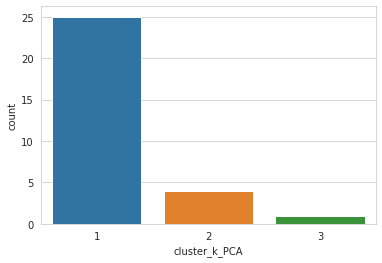

In [ ]:
# countplot to check the number of clusters and number of hotels in each cluster
import seaborn as sns

sns.countplot(x='cluster_k_PCA', data=df_kmeans_pca)


* Analyze the clusters by examining the characteristics of the hotels in each cluster (e.g. amenities, location, ratings, etc.).
* Interpret the clusters by identifying common themes or patterns (e.g. luxury hotels, budget hotels, downtown hotels, etc.).

## Interpretation

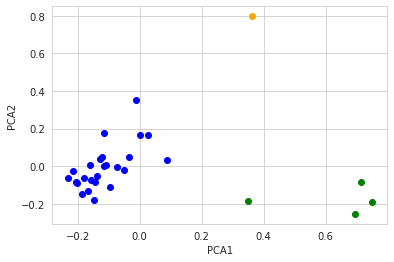

In [ ]:
import matplotlib.pyplot as plt

# Define the x and y variables
x = df_kmeans_pca['PCA1']
y = df_kmeans_pca['PCA2']

# Define the colors for each cluster
colors = ['red', 'blue', 'green', 'orange']

# Create a scatterplot with a different color for each cluster
fig, ax = plt.subplots()
for i in range(1,num_clusters+1):
    ax.scatter(x[df_kmeans_pca['cluster_k_PCA'] == i], y[df_kmeans_pca['cluster_k_PCA'] == i], c=colors[i])

# Set the x and y axis labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

# Show the plot
plt.show()


In [ ]:
selected_words = []

# Create a dictionary to store top keywords for each cluster
top_keywords_dict = {}

# Define a function to check if a word has already been selected
def is_word_selected(word):
    return word in selected_words

def is_noun_adj(pos):
    return pos[:2] == 'NN' or pos[:2] == 'JJ'

def print_top_keywords(cluster):
    # Extract the reviews for the given cluster
    reviews = df_kmeans_pca[df_kmeans_pca['cluster_k_PCA']==cluster]['review_body_clean'].tolist()

    text = ' '.join(reviews)
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum() and not word.lower() in stop_words]

    # Filter out non-noun and non-adjective POS tags
    tagged_tokens = nltk.pos_tag(tokens)
    words = [word for (word, tag) in tagged_tokens if tag in ['NN', 'NNS', 'JJ', 'JJR', 'JJS']]
    
    # Calculate the TF-IDF score for each word and ignore words not present in the vocabulary
    word_tfidf = {}
    for word in set(words):
        try:
            tf = words.count(word) / len(words)
            idf = tfidf.idf_[tfidf.vocabulary_[word]]
            word_tfidf[word] = tf * idf
        except KeyError:
            pass

    # Sort the words by their TF-IDF scores and select the top 10 non-repeated words
    sorted_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)
    selected_words_cluster = set()
    top_keywords = []
    for word, score in sorted_words:
        if word not in selected_words and word not in selected_words_cluster:
            top_keywords.append(word)
            selected_words.append(word)
            selected_words_cluster.add(word)
            if len(top_keywords) == 300:
                break
                
    # Pad the list of top keywords with NaN values if necessary
    if len(top_keywords) < 300:
        top_keywords += [np.nan] * (300 - len(top_keywords))

    # Add the top keywords to the dictionary
    top_keywords_dict[f"Cluster {cluster}"] = top_keywords


# Print the top 10 keywords for each cluster
for i in range(1, num_clusters+1):
    print_top_keywords(i)


In [ ]:
# Create a new DataFrame with columns for each cluster and rows for the top keywords
df_top_keywords = pd.DataFrame(top_keywords_dict)
df_top_keywords.head(10)

,Cluster 1,Cluster 2,Cluster 3
0,staff,laurent,boat
1,floor,apartment,cruise
2,station,hosts,romantic
3,desk,host,event
4,view,home,half
5,quiet,breakfasts,advance
6,price,marais,prices
7,restaurant,recommendations,wrong
8,close,chambre,complimentary
9,coffee,conversation,disappointing


In [ ]:
# df_top_keywords_transposed = df_top_keywords.transpose()
# pd.set_option('display.max_columns', None)
# df_top_keywords_transposed

**Observations**
* **Cluster 1**: This cluster of hotels appears to be situated in a busy area of Paris close to a number of tourist destinations, cafes, and dining establishments. The hotels in this category are often larger, with spacious accommodations, stunning city views, and complimentary WiFi. They offer a shuttle service, a breakfast buffet, and a pool among other attractions. These hotels are clustered together, and several have balconies and are close to the River. Notwithstanding some concerns about noise and outmoded facilities, customers typically compliment the personnel on their friendliness and helpfulness. These hotels are great for travelers who don't mind a little noise but yet want to be close to the city's main attractions.

* **Cluster 2**:  This cluster of hotels appears to be more akin to apartments or guesthouses, with hosts who are familiar with the area and can offer visitors individualized travel advice and maps. The lodgings in this group are more intimate, have a homey feel to them, and serve homemade breakfasts. The attention to detail, including the linens and toiletries offered, is valued by the guests. Travelers who prefer a more intimate and distinctive experience and don't mind staying in a smaller hotel should choose one of these establishments.

* **Cluster 3**: With fewer reviews and less focused keywords, this cluster of hotels appears to be less popular than the other two groups. The cluster appears to be more general and less narrowly focused than the other two clusters.  We might infer from the top keywords that the hotels in this group might be found in the Montparnasse neighborhood, near to the Eiffel Tower and the Champs-Élysées. Due to the lack of specificity in the top terms, we are unable to make any inferences regarding the facilities, personnel, or environment of these hotels.

# Search Engine for Hotels

* Define the objective of the search engine (e.g. finding hotels based on user queries).
* Choose an appropriate technique for encoding the hotel descriptions (e.g. bag-of-words, TF-IDF, word embeddings, etc.).
* Use FAISS to index the hotel descriptions and create a search index.
* Implement a search function that takes in a user query and returns the most relevant hotels based on the search index.

## Objective

Build a search engine that takes a query (e.g. "Clean Hotel") and returns the top 5 hotels whose reviews match closest to the query. 

## Data preparation

We have done most of the raw data formatting in **data preparation** section already (P.S: See data preparation for clustering)

In [ ]:
df_reviews_faiss = df_reviews.copy()
df_reviews_faiss.head()

,review_body,hotel_name,review_body_clean,topics,sentiment
0,Forgot to book a large bed so given a room wit...,Novotel Paris Centre Gare Montparnasse,large bed given room singles small adult norm...,"[(large, bed), room, (small, adult), (normal, ...",Neutral
1,This hotel was really nice overall but they lo...,Novotel Paris Centre Gare Montparnasse,bad hotel nice location overall location hour...,"[hotel, (bad, location), (nice, location), loc...",Neutral
2,Our complimentary breakfast was delicious. Sta...,Novotel Paris Centre Gare Montparnasse,breakfast complimentary staff delicious staff...,"[breakfast, (complimentary, staff), delicious,...",Positive
3,"If I could give 0 stars, I would. Staff comple...",Novotel Paris Centre Gare Montparnasse,give stars staff booked room unhelpful hotel ...,"[stars, staff, room, (unhelpful, hotel), air, ...",Neutral
4,This was a comfortable hotel in Montparnasse n...,Novotel Paris Centre Gare Montparnasse,hotel comfortable montparnasse montparnasse t...,"[hotel, montparnasse, montparnasse, tower, (co...",Neutral


In [ ]:
# extract unique hotel names
hotel_names = df_reviews_faiss['hotel_name'].unique()
hotel_names

array(['Novotel Paris Centre Gare Montparnasse', 'Les3chambres',
       'La Chambre Parisienne', 'Hyatt Regency Paris Etoile',
       'Hotel Darcet', 'Hotel Cecilia Paris',
       'Maison Astor Paris, Curio Collection by Hilton',
       'Hotel Louvre Bons Enfants',
       'Courtyard by Marriott Paris Gare de Lyon',
       'Le VIP Paris Yacht Hotel', 'Hotel Edgar', "Hotel d'Argenson",
       'Hotel du Quai-Voltaire', 'Hotel La Manufacture',
       'Hotel de Suede St. Germain', 'Hotel du Danube Saint Germain',
       'Assia & Nathalie',
       'Niepce Paris Hotel, Curio Collection by Hilton', 'Perreyve Hotel',
       'Hotel Comete Paris', "Hotel de L'Union",
       'Renaissance Paris Arc de Triomphe Hotel',
       'Hotel Cervantes by HappyCulture', 'Hotel du Haut Marais',
       'Holiday Inn Express Paris-Canal de la Villette',
       "Hotel Saint-Louis en l'Isle", 'Hotel Haussmann Saint Augustin',
       'Hotel du College de France', "Jack's Hotel",
       'Hotel Westside Arc de Triomph

In [ ]:
# create a count vectorizer and fit on the review bodies
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df_reviews_faiss['review_body_clean'])
X.shape

(1492, 7294)

In [ ]:
# convert the topics column to a string
import spacy

# load spaCy model
nlp = spacy.load('en_core_web_sm')

# convert topics strings to spaCy Doc objects
df_reviews_faiss['topics'] = df_reviews_faiss['topics'].apply(lambda x: ' '.join([str(i) for i in x]))
df_reviews_faiss['topics'] = df_reviews_faiss['topics'].apply(lambda x: nlp(x))


# extract lemmas from spaCy Doc objects
df_reviews_faiss['topics'] = df_reviews_faiss['topics'].apply(lambda x: ' '.join([token.lemma_ for token in x]))

# create a count vectorizer and fit on the topics
count_vectorizer = CountVectorizer()
topics_vectorizer = count_vectorizer.fit_transform(df_reviews_faiss['topics'])
topics_vectorizer.shape

(1492, 4726)

In [ ]:
# create an array of sentiments
sentiments = np.array(df_reviews['sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1}))

In [ ]:
sentences = (df_reviews['review_body_clean']).tolist()
sentences[0]

' large bed given room singles small adult normal adult fell several times limited choiceservice goodbathroom weird toilet sink removed shower stay cause sleep proper bed larger bed sleep'

## Initialize sentence transformer model


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens') 

In [ ]:
%%time
sentence_embeddings = model.encode(sentences)
sentence_embeddings.shape

CPU times: user 4min 51s, sys: 406 ms, total: 4min 52s
Wall time: 4min 55s


(1492, 768)

In [ ]:
# normalize sentence embeddings
sentence_embeddings = sentence_embeddings / np.linalg.norm(sentence_embeddings, axis=1, keepdims=True)


In [ ]:
# use inner product similarity instead of L2 distance
d = sentence_embeddings.shape[1]
d

768

## Creating a search index using FAISS

In [ ]:
# use inner product similarity instead of L2 distance
index = faiss.IndexFlatL2(d)
index.add(sentence_embeddings)

In [ ]:
index.is_trained

True

In [ ]:
index.ntotal

1492

## Search function

The search_faiss function takes a query and returns the top 5 hotels whose reviews match the closest to the query. It does so by encoding the query, searching the Faiss index for the k nearest neighbors to the query embedding, and then counting the occurrences of each hotel name among the k nearest neighbors. Finally, it sorts the hotels by their count and returns the top 5.

In [ ]:
import lda
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(topics_vectorizer)

LatentDirichletAllocation(random_state=42)

In [ ]:

hotel_names = df_reviews_faiss['hotel_name'].tolist()
hotel_indices = {hotel: i for i, hotel in enumerate(hotel_names)}

def search_hotels_faiss(query):
    # preprocess the query
    query_doc = nlp(query)
    query_clean = ' '.join([token.lemma_ for token in query_doc if token.pos_ in ['NOUN', 'VERB', 'ADJ']])

    # encode query into sentence embedding
    query_embedding = model.encode([query_clean])

    # search for similar hotels using Faiss
    k = 10
    D, I = index.search(query_embedding, k) #searches for the k nearest neighbors of the query embedding in the index
    # print(f"distances between the query vector : {D}")
    # print(f"closest vectors in the index : {I}")
    hotel_scores = {}
    hotel_topics = {}
    valid_indices = min(len(I[0]), k)
    for i in range(valid_indices):      
      # hotel_names = index of each hotel name corresponds to its index in the sentence_embeddings array that was used to build the index.
      # In the for loop, for each of the k nearest neighbors returned by the index search, we retrieve the corresponding hotel name using 
      # hotel_names[I[0][i]]. The I[0][i] part retrieves the index of the i-th nearest neighbor from the I array, 
      # and then hotel_names[I[0][i]] retrieves the hotel name corresponding to that index from the hotel_names list.    
        hotel = hotel_names[I[0][i]]
        # get the corresponding topic/keyword for the current hotel
        topic = df_reviews_faiss['topics'][I[0][i]]
        if hotel in hotel_scores:
            hotel_scores[hotel] += D[0][i]  # accumulate cosine similarity scores
            hotel_topics[hotel] += topic
        else:
            hotel_scores[hotel] = D[0][i]
            hotel_topics[hotel] = topic

    # get the top 5 matching keywords/topics and their scores
    top_hotels = sorted(hotel_scores.items(), key=lambda x: x[1], reverse=True)[:5]

    # get the corresponding topic/keyword for the current hotel
    for i, (hotel, score) in enumerate(top_hotels):
        topic = hotel_topics[hotel]
        top_hotels[i] = {'Hotel': hotel, 'Match Score': score, "Matching reviews'-keywords" : topic}
    return top_hotels

In [ ]:
def print_top_hotels(query):
    top_hotels = search_hotels_faiss(query)
    # print(top_hotels)
    df = pd.DataFrame(top_hotels)
    df = df.reset_index()
    df['index'] = df['index'] + 1
    df = df.rename(columns={'index': 'Rank'})
    df = df.set_index('Rank')
    # Set display options to adjust column width and wrap text
    pd.set_option('display.max_colwidth', 100)
    pd.set_option('display.max_columns', 1)

    # Create a Styler object with left-aligned header
    styled_df = (df.style.set_properties(**{'width': '12cm'})
                          # .set_properties(subset=[c for c in df.columns if c != 'Topic'], width='auto')
                          .set_properties(subset=[c for c in df.columns if c != 'Topic'], width='auto', **{'text-align': 'left'})
                          .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))
                      
    # Display the styled DataFrame
    display(styled_df)

    # return df

## Examples

### Example1

In [ ]:
print_top_hotels("clean Hotel with free breakfast")

,Hotel,Match Score,Matching reviews'-keywords
Rank,,,
1,Hotel Cecilia Paris,795.343384,"hotel ( pleasant , staff ) ( excellent , breakfast ) ( fresh , room ) ( clean , room ) ( simple , bit ) ( standard , bit ) ( european , bit ) water ( warm , time )staff location ( nice , breakfast ) ( short , room ) letoile room ( nice , size ) bath ( comfortable , wifi ) wifi ( effective , wifi ) ( free , wifi )hotel ( nice , staff ) arc ( close , champselysee ) ( cooperative , champselysee ) ( friendly , champselysee ) breakfast ( good , freind ) return"
2,"Maison Astor Paris, Curio Collection by Hilton",530.463135,"( small , room ) ( little , bit ) bed atmosphere ( sweet , staff ) ( friendly , breakfast ) ( free , breakfast ) ( excellent , breakfast )hotel ( eleglant , breakfast ) ( comfortable , breakfast ) ( excellent , location ) ( comfortable , location ) ( quiet , location ) ( great , location ) ( less , mile ) triumph ( comfortable , staff ) ( helpful , staff )"
3,Hotel Westside Arc de Triomphe,265.708344,"hotel staff ( pleasant , location ) location ( friendly , station ) ( good , station ) ( quiet , place ) ( good , value ) money breakfast spa ( bountiful , area ) ( reasonable , area ) ( small , pool ) chance"
4,Hotel du College de France,265.667664,"people base ( excellent , visit ) ( affordable , price ) heart ( quarti , minute ) street ( quiet , staff ) ( cordial , room ) ( supportive , room ) ( maximum , use ) space ( large , window ) lot ( good , breakfast )"
5,Les3chambres,265.642700,"( wonderful , discovery ) ( warm , welcome ) ( beautiful , surrounding ) attention breakfast ( amazing , place ) ( detailand , place ) ( wonderful , place ) atmosphere ( great , place ) sightseeing sight laurent"


### Example2

In [ ]:
print_top_hotels("Hotel for business meetings, near eiffel tower")

,Hotel,Match Score,Matching reviews'-keywords
Rank,,,
1,Hyatt Regency Paris Etoile,1300.655029,"view eiffel tower ( close , restaurant ) triomphe breakfast hotel champagne bar windo topconvinient place hotel business meeting room facility ( sufficient , room ) view eifle ( great , tower ) biz tripway hotel building city breakfast ( good , room ) bit ( small , size ) room view eiffel towerconference refurbishment year lobby room hour flight pm room room eiffel tower location ( great , restaurant ) catch conference ( nice , concierge ) desk staff ( present , room ) card lobby ( bottled , water ) ( european , hotel ) toothbrushroom remodeledso drawback room room ( smallsome , eiffel ) towerlobby ( greatgood , recommendation ) metro station block street business pleasureelevator floor keypad lobby screen elevator lobbywe use lobby ( available , resturant )"
2,Hotel d'Argenson,523.251282,"hotel ( great , location ) distance champ ( major , attraction ) hotel ( great , room )hotel ( average , room ) ( interior , receptionist ) ( wonderful , note ) traveler ( many , hotel ) ( parisian , hotel ) elevator ( small , wife ) ( tough , time ) elevator carryon baggage"
3,Holiday Inn Express Paris-Canal de la Villette,261.500793,"hotel ( beautiful , floor ) ( many , floor ) hotel ( available , hotel ) area ( many , area ) ( big , area ) ( many , people ) hotel service man hall"
4,Hotel du Quai-Voltaire,261.170624,"hotel eiffel tower river room room air ( negative , conditioner ) bed furniture floor carpet ( old , place ) ( modest , place )"
5,Novotel Paris Centre Gare Montparnasse,261.080933,"hotel gare montparnasse ( close , station ) day trip station ( early , morning ) hotel room walk eiffel tower ( spacious , minute ) night decoration ( scary , hotel )"


### Example3

In [ ]:
print_top_hotels("beautiful view for a romantic proposal")

,Hotel,Match Score,Matching reviews'-keywords
Rank,,,
1,Hotel Cecilia Paris,553.466675,"honeymoon hotel cecilia request ( nice , view ) ( good , view ) location ( lovely , boutique ) hotel ( small , hotel ) ( spectacularwe , sayalthough ) check ( perfect , pm ) check ( great , service )hotel boutique hotel ( cut , view ) ( clean , view ) ( helpful , location ) ( well , place ) hotel cecilia"
2,Hotel d'Argenson,278.394287,"hotel ( great , location ) distance champ ( major , attraction ) hotel ( great , room )"
3,Hotel Louvre Bons Enfants,278.297577,"( great , room ) ( small , room ) ( good , option ) day ( principal , spot ) room ( good , location )"
4,Hotel Westside Arc de Triomphe,278.133057,"( small , hotel ) champsélysées ( close , facility ) ( basic , facility ) ( helpful , staff ) ( pleasant , value ) ( decent , value ) ( excellent , neighbourhood )"
5,Hotel du Haut Marais,277.565887,"hotel location ( fantastic , heart ) ( right , heart ) pasqualine ( friendly , apartment ) ( helpful , apartment ) ( perfect , stay )"


### Example4

In [ ]:
print_top_hotels("luxury hotel with swimming pool and balcony, near beach")

,Hotel,Match Score,Matching reviews'-keywords
Rank,,,
1,Hotel Westside Arc de Triomphe,1090.479614,"team room ( great , room ) ( friendly , room ) location ( comfortable , breakfast ) ( good , pool ) ( complete , pool ) ( nice , pool ) ( specaial , thank ) team future repeat experiencelocation ( good , area ) hotel atmosphere staff use swimming ( cozy , pool ) ( friendly , pool ) ( lovely , restaurant ) ( many , area )size ( good , room ) price range bath ( hot , water ) ( good , staff ) breakfast ( friendly , pool ) ( lovely , pool ) ( lovely , pool ) day check ( late , hotel ) use facility taxi family ( wonderful , restaurant ) roadnight minute corner host ( wonderful , restaurant ) ( local , restaurant ) bar ( fabulous , room ) ( good , size ) ( large , room ) door bedroom shower room ( great , sharer )"
2,Hotel La Manufacture,542.859985,"( fantastic , room ) ( spacious , show ) ( great , view ) night pool area sun ( attentive , staff ) food restaurant( lovely , room ) ( top , floor ) ( amazing , view ) hotel spot city ( romantic , city ) ( comfortable , city ) breakfast bed ( little , balcony )"
3,Hyatt Regency Paris Etoile,273.487091,"trip wife birthday hotel experience friendliness staff ( complimentary , drink ) sky ( great , bar ) bar station minute hotel hotel"
4,Hotel d'Argenson,273.458252,"hotel ( great , location ) distance champ ( major , attraction ) hotel ( great , room )"
5,Holiday Inn Express Paris-Canal de la Villette,272.775208,"hotel ( functional , luxury ) brand ( clean , room ) ( top , floor ) balcony view canal location tourist view ( practical , metro ) side ( local , restaurant ) shop"


### Example5

In [ ]:
print_top_hotels("hotel near downtown")

,Hotel,Match Score,Matching reviews'-keywords
Rank,,,
1,Holiday Inn Express Paris-Canal de la Villette,812.691772,"hotel ( beautiful , floor ) ( many , floor ) hotel ( available , hotel ) area ( many , area ) ( big , area ) ( many , people ) hotel service man hallhotel location issue hotel neighborhood hotel ( perfect , hotel ) ( lovely , hotel ) ( bistro , shop ) ( ideal , town ) ( direct , town )holiday ( classic , standart ) herestaff ( available , room ) hotel reason"
2,Hyatt Regency Paris Etoile,539.109009,"convinient place hotel business meeting room facility ( sufficient , room ) view eifle ( great , tower ) biz tripway hotel building city breakfast ( good , room ) bit ( small , size ) room view eiffel tower"
3,"Niepce Paris Hotel, Curio Collection by Hilton",271.461945,"hotel ( intimate , staff ) ( great , location ) ( great , neighborhood ) ( many , eatery ) ( great , eatery ) ( close , hotel ) city hotel ( amazing , luxury )"
4,Courtyard by Marriott Paris Gare de Lyon,271.184601,"night friend hotel ( high , floor ) ( nice , view ) sacre ( friendly , room ) ( modern , style ) hotel ( close , gate ) lyon ( comfortable , lyon ) ( young , lyon )"
5,Hotel La Manufacture,269.467255,"( nice , room ) confrot room ( good , price ) goodal staff room service hotel"


# Learning and Reflection

* Reflect on the results of the clustering and search engine tasks and identify any limitations or challenges encountered.
* Discuss the strengths and weaknesses of the approaches used and suggest potential improvements or alternative methods.
* Reflect on the overall experience and what we have learned from the project.

## Refllection on results

- Clustering algorithm was able to cluster hotels based on keywords such as "clean room", "good food" etc. However it did not understand semantics well.
- However our FAISS model is able to find relevant search results by matching cleaned review text with search query.
- It understands semantics very well - for example, when our search query was "near beach", model was able to understand that we want a hotel that is near to waterbody and hence gave us search results with swimming pool and canal.
- Topic Modelling and sentiment analysis help us in making better decisions about a particular hotel. For example if we search for "free breakfast", we might find relevant results but if the hotel's feedback are negative then we may not choose that hotel.


## Limitations or challenges

- Clustering algrithm cannot match text based on semantics. For example if you search for "good food" and review text contains "nice dinner" - it won't be able to match those reviews.

- Our sentiment analysis takes into account the entire text for calculating polarity. So, if review contains "good food" and "bad ambience" it nuetralises both sentences and gives overall sentiment score as neutral. This can be improved by implementing aspect of based opinion mining.

- We can further optimise our algorithm for considering all the reviews of a particular hotel and further reducing dimensions to give more relevant results.

## Strengths and Weaknesses of the approaches

- Our model is able to provide relevant search results and understand semantics.
- Cleaning data based on POS tagging helps in removing unnecessary text and thus reduce data dimensions.
- Topic Modelling helps in summarising the review text and enhances readability.
- Sentiment analysis helps us in rating a particular hotel and thus making better decisions.
- Our topic modelling still does not give great results because review text contains grammatical errors and broken language, thus we need to make our system tolerant against the same.
- We can implement topic based opinion mining to get relevant sentiment for specific topics within the reveiw text.

## Overall experience and Learnings

* Our project involves a wide range of techniques and tools related to NLP, machine learning, and data analysis. By working with a real-world dataset of Paris hotels and reviews, we were able to gain practical experience in applying these techniques and tools to solve a specific business problem.

* One of the key learning points from this project is the importance of data preprocessing and cleaning. By removing duplicates, handling missing values, and extracting relevant information from the raw data, we are able to create a clean and structured dataset that could be used for further analysis and modeling. 

* Another important aspect of this project is the use of NLP techniques such as POS tagging and sentiment analysis. By analyzing the text data associated with each hotel review, we are able to identify key features and sentiments associated with each hotel, which could then be used to group similar hotels together and identify common themes. This can be useful for both customers and hotel owners, as it can provide insights into the key features and characteristics of each hotel and help guide decision-making related to hotel management and customer service.

* Additionally, this project involves the use of machine learning techniques such as k-means clustering and PCA to identify groups of hotels with similar features and reduce the complexity of the feature space. By selecting an optimal value of k and examining the top words associated with each cluster, we are able to gain deeper insights into the key features and characteristics of each group of hotels.

* Finally, building a search engine using FAISS can be a powerful way to enable users to search for hotels based on their specific requirements or preferences. By using BERT sentence embeddings to represent the meaning of each hotel review, the search engine can identify the closest matches to a user's query and return relevant results, improving the user experience and driving business for hotel owners.

  Overall, this project provided valuable insights into the key features and characteristics of Paris hotels, demonstrating the potential of NLP and machine learning for solving business problems. It is an excellent opportunity to solidify our understanding of these essential concepts taught in this course.
